In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
# import the libraby you need here

dtype('uint8')

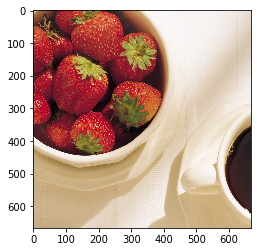

In [2]:
rgbimg = cv2.cvtColor(cv2.imread("image.jpg",cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(rgbimg)
rgbimg.dtype

C:\Users\farha\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


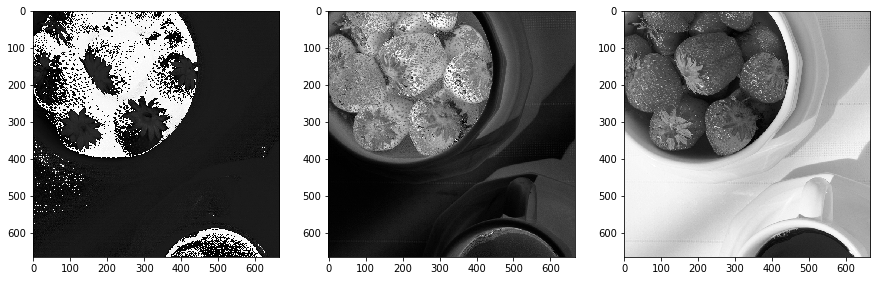

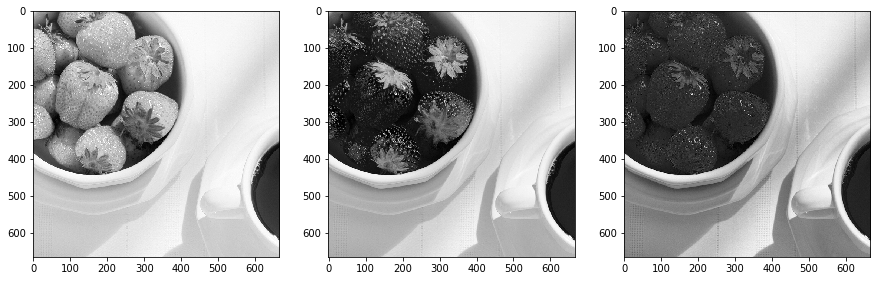

In [3]:
#  show each components in different color models
def rgb2hsi(rgbimg):
    # convert rgb images to hsi images
    #Load image with 32 bit floats as variable type
    # Hint: Normalize Hue value to [0,255] for demonstration purpose.
    rgb=np.divide(rgbimg,255)
    h = []
    s = []
    i = []
    
    for height in range (rgbimg.shape[0]):
        for width in range (rgbimg.shape[1]):
            r=rgb[width,height,0]
            g=rgb[width,height,1]
            b=rgb[width,height,2]

            theta= math.degrees(math.acos(0.5*((r-g)+(r-b))/(((r-g)**2)+((r-b)*(g-b)))**0.5)+1e-10) # add a small value (1e-10) to avoid NaN condition

            if (b<=g): 
                Hue=theta
            elif (b>g): 
                Hue=360-theta
            
            Saturation=1-((3/(r+g+b))*min(r,g,b))

            Intensity=(r+g+b)/3

            h.append(Hue)
            s.append(Saturation)
            i.append(Intensity)
    h=np.reshape(np.asarray(h),(rgbimg.shape[0],rgbimg.shape[1]))
    s=np.reshape(np.asarray(s),(rgbimg.shape[0],rgbimg.shape[1]))
    i=np.reshape(np.asarray(i),(rgbimg.shape[0],rgbimg.shape[1]))   
    return h,s,i

def hsi2rgb(hsiimg):
    r=[]
    g=[]
    b=[]
    for height in range (hsiimg.shape[0]):
        for width in range (hsiimg.shape[1]):
            h=hsiimg[width,height,0]
            s=hsiimg[width,height,1]
            i=hsiimg[width,height,2]
            
            if(0<h<=120):
                B=(1-s)/3
                R=(1+((s*math.cos(math.radians(h)))/math.cos(math.radians(60-h))))/3
                G=1-(R+B)
                
                R=R*3*i
                G=G*3*i
                B=B*3*i

            elif(120<h<=240):
                h=h-120
                R=(1-s)/3
                G=(1+((s*math.cos(math.radians(h)))/math.cos(math.radians(60-h))))/3
                B=1-(R+G)
                                
                R=R*3*i
                G=G*3*i
                B=B*3*i
                
            elif(240<h<=360):
                h=h-240
                G=(1-s)/3
                B=(1+((s*math.cos(math.radians(h)))/math.cos(math.radians(60-h))))/3
                R=1-(B+G)
                
                R=R*3*i
                G=G*3*i
                B=B*3*i
                 
            r.append(R)
            g.append(G)
            b.append(B)

    r=np.reshape(np.asarray(r),(hsiimg.shape[0],hsiimg.shape[1]))
    g=np.reshape(np.asarray(g),(hsiimg.shape[0],hsiimg.shape[1]))
    b=np.reshape(np.asarray(b),(hsiimg.shape[0],hsiimg.shape[1]))  

    return r,g,b


# rgb2hsi
h,s,i = rgb2hsi(rgbimg)
# show the result
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(h,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(s,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(i,cmap='gray')

# construct hsi images
hsiimg = np.zeros((rgbimg.shape[0],rgbimg.shape[1],3))
hsiimg[:,:,0] = h
hsiimg[:,:,1] = s
hsiimg[:,:,2] = i

# hsi2rgb
r,g,b = hsi2rgb(hsiimg)
# show the result
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(r,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(g,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(b,cmap='gray')

### Question 1

Q:  We can actually find discontinuity in hue(H) component of the image that is hard to interpret. 
    In this case, it is especially apparent around the strawberries, which are depicted in gray level values near both black       and white.
    Why is that?     
    
A: Because hue is a circular quantity,Discontinuity occurs at the point where the rotation angle of the theta in the HSI color space is between an angle of 360 and 0. In our image, the object of strawberries are red that's why the discontinuity only appears in that object.

C:\Users\farha\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


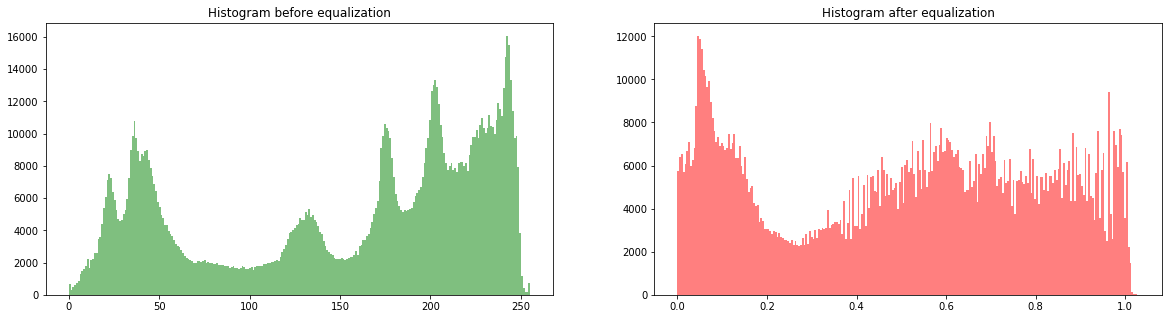

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'HSI Image as Color Model')

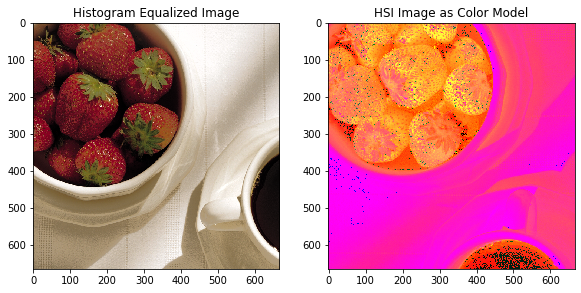

In [4]:
# histogram equalization

def histeq_calculation(im,nbr_bins=256):
    imhist,bins = np.histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() 
    cdf = 1 * cdf / cdf[-1] # normalize (value component max is 1.0)

    # use linear interpolation of cdf to find new pixel values
    im2 = np.interp(im.flatten(),bins[:-1],cdf)
    im_hist = im2.reshape(im.shape)
    return im_hist, cdf

def histogram_equalization(input):
    #pick only the intensity to equalize
    input[:,:,2], cdf = histeq_calculation(input[:,:,2])
    r,g,b = hsi2rgb(input)
    heimage = np.zeros((rgbimg.shape[0],rgbimg.shape[1],3))
    heimage[:,:,0] = r
    heimage[:,:,1] = g
    heimage[:,:,2] = b
    return heimage,input
    
heimage,heimagehsi = histogram_equalization(hsiimg) #choose the color model you want to use as input here (rgbimg or hsiimg)
fig,ax = plt.subplots(1,2,figsize=(20,5))
ax[0].hist(rgbimg.ravel(), bins=256, alpha = 0.5, color = 'g')
ax[0].set_title('Histogram before equalization')
ax[1].hist(heimage.ravel(), bins=256, alpha = 0.5, color = 'r')
ax[1].set_title('Histogram after equalization')
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(heimage)
plt.title("Histogram Equalized Image")
plt.subplot(1,3,2)
plt.imshow(heimagehsi)
plt.title("HSI Image as Color Model")

### Question 2

Q: which color model do you use? Briefly explain the reason why.

A:  Histogram equalization is a technique for adjusting image intensities to enhance contrast. While enhancing the intensity or saturation component for high-quality color image enhancement, keeping the hue component unchanged is important; thus, perceptual color models such as HSI, HSL and HSV were used.  For general hue-preserving color image enhancement, then the intensity or saturation component is enhanced, but the hue component remains unaltered. And also histogram equalization will work the best when applied to images with much higher color depth than palette size, like continuous data or 16-bit gray-scale images. So thats why color histogram equalization can be achieved by converting a RGB image into HSV/HSI image and enhancing the Intensity while preserving hue and saturation components.

C:\Users\farha\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


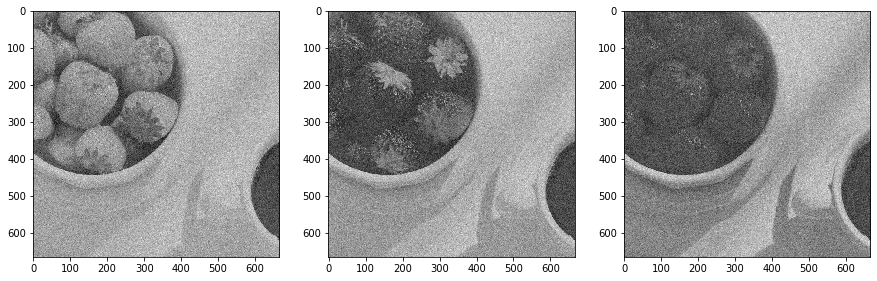

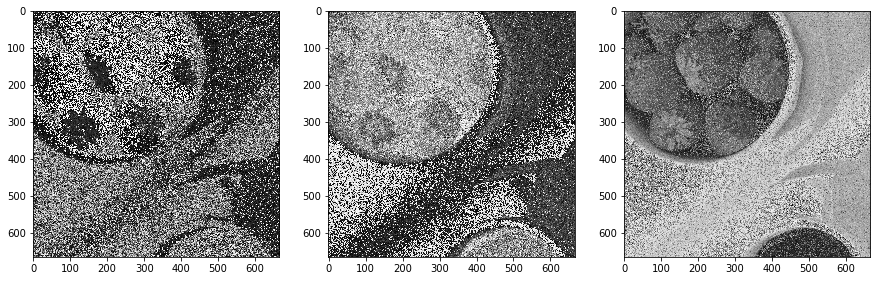

In [13]:
# converting noisy RGB images HSI
gaussian = np.random.normal(0, 28, (rgbimg.shape[0],rgbimg.shape[1],3))
noisy_rgb = rgbimg + gaussian
(r, g, b) = cv2.split(noisy_rgb)
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(r,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(g,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(b,cmap='gray')

noisy_rgb = noisy_rgb.astype('uint8') # I change the data type of noisy rgb so that it can displays the HSI channels clearly
noisy_h,noisy_s,noisy_i = rgb2hsi(noisy_rgb)
plt.figure(figsize = (15,10))
plt.subplot(1,3,1)
plt.imshow(noisy_h,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(noisy_s,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(noisy_i,cmap='gray')

### Question 3

Q:  Briefly compare the different results of six components from two different color models (R,G,B,H,S,I).
    What components in the HSI model are severely disturbed? Why is that?

A: the three color planes of an RGB image corrupted by additive Gaussian noise,  fine grain noise such as this tends to be less visually noticeable in a grayscale image than HSI Image. In HSI Image, the degradation in hue and saturation planes is due to the nonlinearity of cos and min operations, the intensity plane doesn't have very visible noises because it has a wide color depth so the gaussian also widely spread, and the intensity calculation that took an average color channel so it will reduce the gaussian noise. 